In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
gt_means = np.array([-2, 1])
gt_pi = np.array([.3, .7])
var = 1

N = 1000
X = np.random.normal(gt_means[1], var**0.5, N)
X[:int(gt_pi[0]*N)] = np.random.normal(gt_means[0], var**0.5, int(gt_pi[0]*N))
# NB: we generated with the exact proportions (a real generation would not necessarily have the exact proportions)

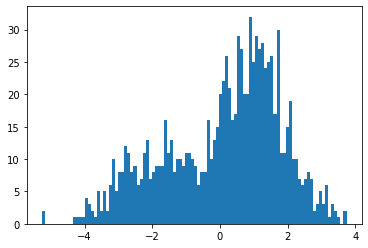

In [3]:
plt.hist(X, bins=100);

In [4]:

def plot_params(mu, w):
    x = np.linspace(-10, 10, 1001)
    plt.plot(x, w[0] * stats.norm.pdf(x, mu[0], var**0.5))
    plt.plot(x, w[1] * stats.norm.pdf(x, mu[1], var**0.5))
    plt.hist(X, density=True, bins=100, alpha=0.5)
    plt.show()

def E(X, mu, w):
    X = X[None,:]
    mu = mu[:, None]
    rprime = stats.norm.pdf(X, mu, var**0.5)
    return rprime / rprime.sum(axis=0)


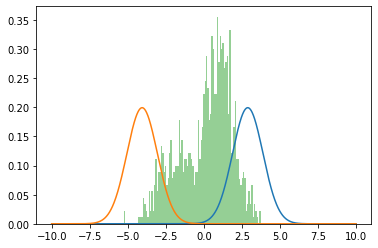

[[7.57906235e-02 1.79751134e-07 7.48424829e-11 ... 9.98709090e-01
  1.00000000e+00 9.81487250e-01]
 [9.24209376e-01 9.99999820e-01 1.00000000e+00 ... 1.29091015e-03
  1.08992822e-10 1.85127499e-02]]


In [5]:

mu = np.random.normal(0, 10, 2) # initiliaze the parameters
w = [0.5, 0.5] # initiliaze the parameters
plot_params(mu, w)
r = E(X, mu, w)
print(r)

In [6]:
print(mu)

[ 2.88481964 -4.05623673]


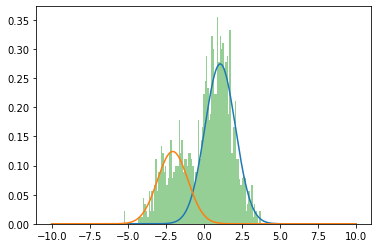

In [7]:
def M(X, r):
    mu = np.sum(X*r, axis=1) / np.sum(r, axis=1)
    w = np.sum(r, axis=1) / X.size
    return mu, w

history = [(mu, w)]

mu, w = M(X, r)
plot_params(mu, w)
history.append((mu, w))


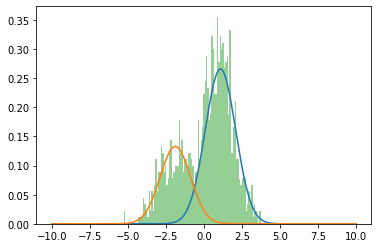

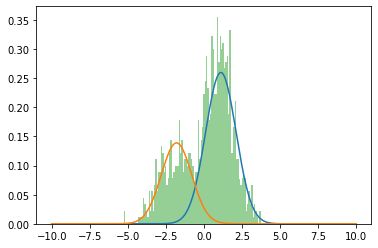

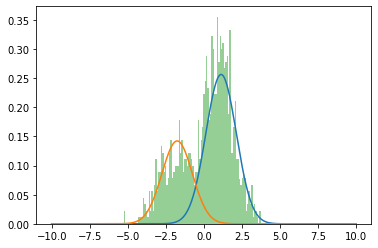

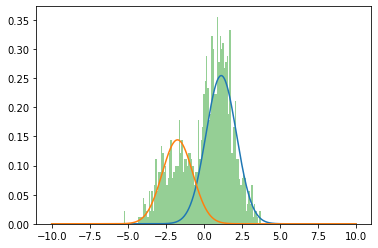

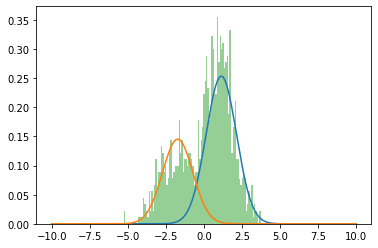

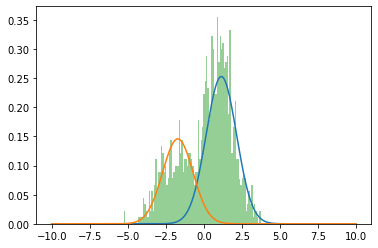

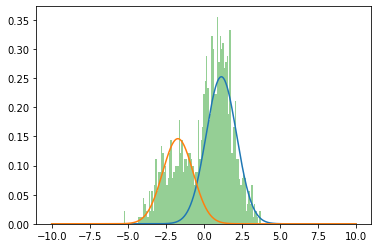

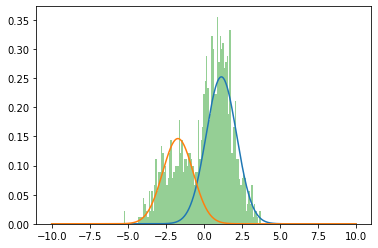

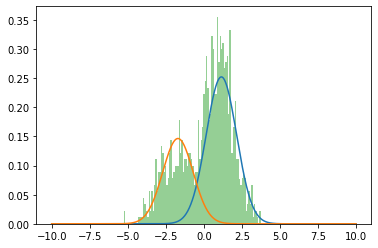

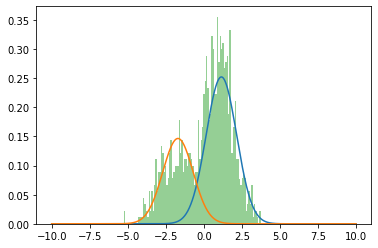

In [8]:
for i in range(10):
    r = E(X, mu, w)
    mu, w = M(X, r)
    plot_params(mu, w)
    history.append((mu, w))


In [9]:
print(mu)

[ 1.15175935 -1.70290916]


In [10]:
print(w)

[0.63248605 0.36751395]


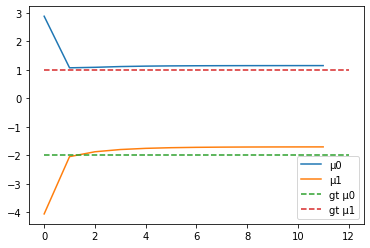

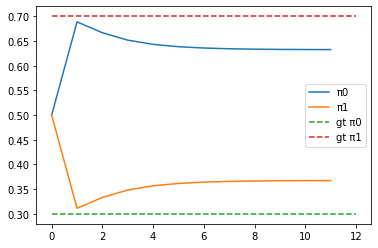

In [11]:
plt.plot([h[0] for h in history], label=["μ0", "μ1"])
plt.plot([0, len(history)], [[gt_means[0], gt_means[1]]]*2, '--', label=["gt μ0", "gt μ1"])
plt.legend()
plt.show()
plt.plot([h[1] for h in history], label=["π0", "π1"])
plt.plot([0, len(history)], [[gt_pi[0], gt_pi[1]]]*2, '--', label=["gt π0", "gt π1"])
plt.legend()
plt.show()
